In [21]:
import os
import pandas as pd

# Directorio donde se encuentra el archivo CSV
directorio = "C:\\Users\\HP\\OneDrive\\Documentos\\Big Data\\Big data - TP2 (1)"

# Nombre del archivo CSV
archivo_csv = "Base Airbnb NY.csv"

# Construir la ruta absoluta al archivo CSV
ruta_absoluta = os.path.join(directorio, archivo_csv)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_absoluta)

# Mostrar los primeros registros del DataFrame
print(df.head())

#Guardo el número de filas en una variable:
num_filas_antes = len(df)

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room  149.0               1                  9  20

In [22]:
#elimino los duplicados
df_sin_duplicados = df.drop_duplicates(keep='first')
#guardo el nuevo archivo#
df_sin_duplicados.to_csv('datos_sin_duplicados.csv', index=False)
#agarro el nuevo conjunto de duplicados
num_filas_despues = len(df_sin_duplicados)
# Calcular cuántas filas fueron eliminadas
filas_eliminadas = num_filas_antes - num_filas_despues

# a) Mostrar el número de filas eliminadas
print(f"Se eliminaron {filas_eliminadas} filas duplicadas.")


Se eliminaron 10 filas duplicadas.


In [23]:
#Imprimimos las columnas para ver cuales eliminamos:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [24]:
#ahora, con esto eliminado, podemos decir que eliminaremos las columnas: id, name, host_id, host_name, neighbourhood,last review. Esto es debido a que son nombres o valores sin importancia, información acerca mas de donde vieien los datos.
columnas_a_eliminar = ['id', 'name', 'host_id','host_name','neighbourhood','last_review']
df_sindl_sincol = df_sin_duplicados.drop(columns=columnas_a_eliminar)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df_sindl_sincol.to_csv('datos_sin_duplicados_sin_columnas.csv', index=False)

In [25]:
b) print(df_sindl_sincol.columns)


Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [26]:
# Crear una máscara booleana de valores faltantes
valores_faltantes = df_sindl_sincol.isna()

# Sumar los valores True por columna
total_valores_faltantes_por_columna = valores_faltantes.sum()

# Mostrar el número de valores faltantes por columna
print(total_valores_faltantes_por_columna)

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [27]:
#c) Ahora, los métodos que vamos a usar para llenar los datos vacios son:
# eliminación si ambos datos están ausentes ya que consideramos que son demasiados datos perdidos, y teniendo en cuenta el tamaño de la base, no tiene sentido estimar tanto
# utilziar el metodo de ajuste de dummy, donde determinamos que datos están ausentes y creamos dos variables nuevas que son el promedio de los datos en dichas variables. Consideramos que el mejor ya que tenemos referencia de la variable sin estos datos de más y la variable con la totalidad de datos
#Eliminar filas donde ambas variables están ausentes
df_sindl_sincol.dropna(subset=['price', 'reviews_per_month'], how='all', inplace=True)

# Crear una variable dummy para 'price' y 'reviews per month'
df_sindl_sincol['price_dummy'] = df_sindl_sincol['price'].notnull().astype(int)
df_sindl_sincol['reviews_per_month_dummy'] = df_sindl_sincol['reviews_per_month'].notnull().astype(int)

# Calcular el promedio de 'price' y 'reviews per month'
price_promedio = df_sindl_sincol['price'].mean()
reviews_per_month_promedio = df_sindl_sincol['reviews_per_month'].mean()

# Llenar los valores faltantes con el promedio
df_sindl_sincol['price*'] = df_sindl_sincol['price'].fillna(price_promedio)
df_sindl_sincol['reviews_per_month*'] = df_sindl_sincol['reviews_per_month'].fillna(reviews_per_month_promedio)


In [29]:
from sklearn.preprocessing import LabelEncoder
e) 
# Inicializar el codificador
label_encoder = LabelEncoder()

# Convertir las variables categóricas en variables numéricas
df_sindl_sincol['neighbourhood_group'] = label_encoder.fit_transform(df_sindl_sincol['neighbourhood_group'])
df_sindl_sincol['room_type'] = label_encoder.fit_transform(df_sindl_sincol['room_type'])


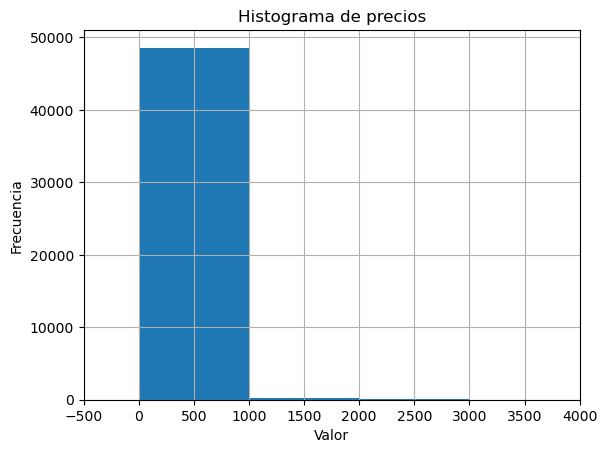

In [34]:
#d) volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['price'].hist()

# Establecer límite máximo en el eje x
plt.xlim(right=4000)

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [35]:
#en precios no hay valores sin sentido

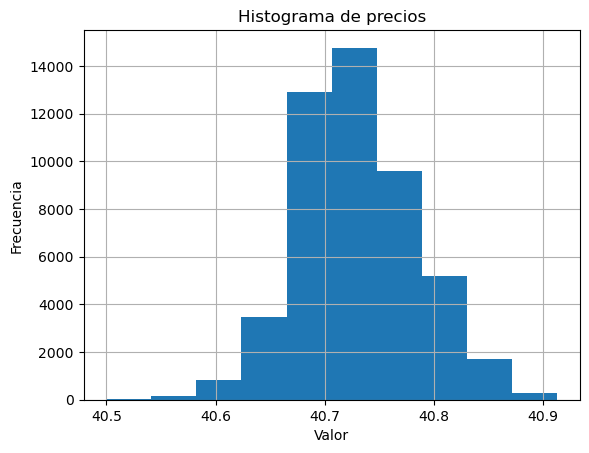

In [36]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['latitude'].hist()

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [38]:
#no hay outliers valores sin sentido

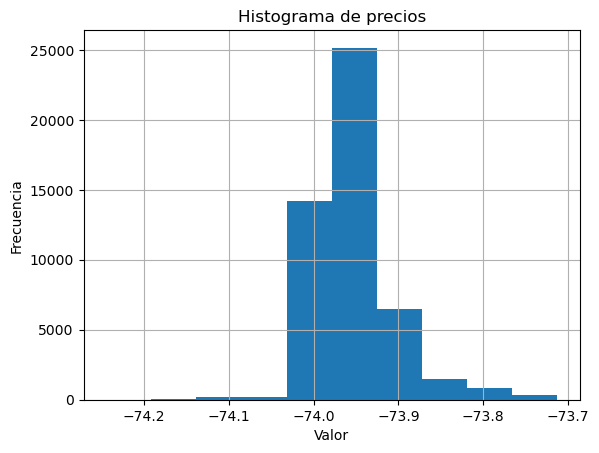

In [40]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['longitude'].hist()

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [41]:
#no hay valores sin sentido.

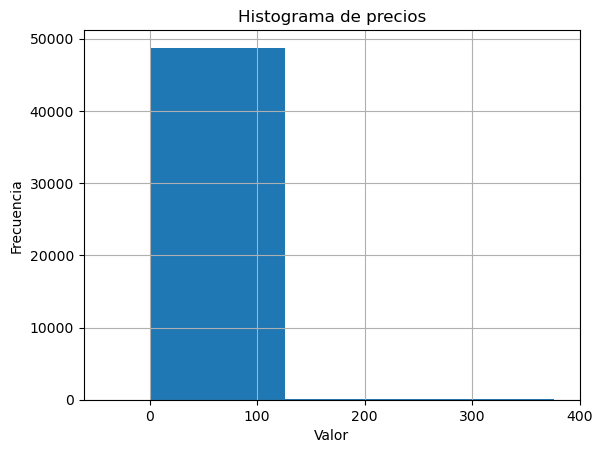

In [43]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['minimum_nights'].hist()

plt.xlim(right=400)

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [44]:
#no hay valores sin sentido

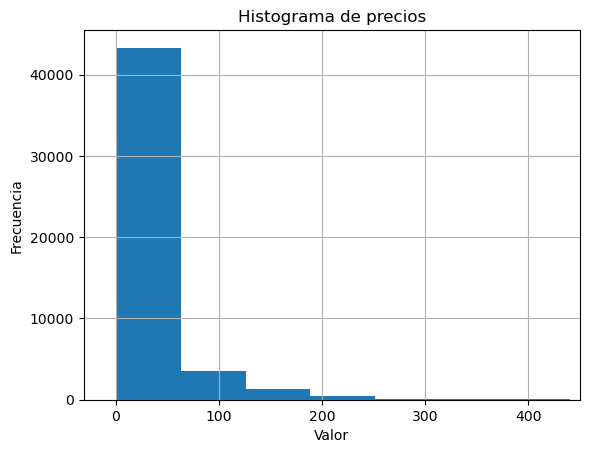

In [46]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['number_of_reviews'].hist()

plt.xlim(right=450)

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [47]:
#no hay valores anormales

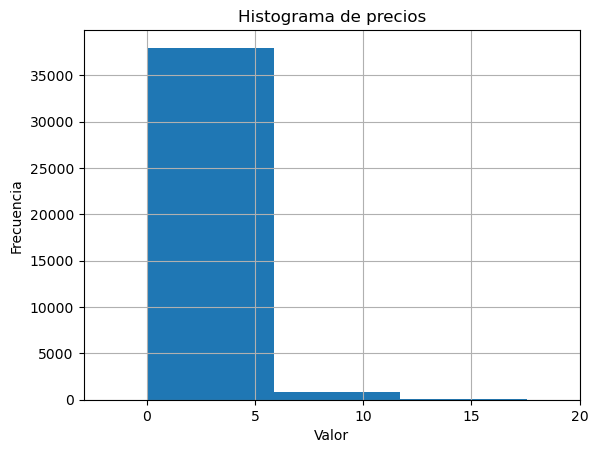

In [49]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['reviews_per_month'].hist()

plt.xlim(right=20)

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [50]:
#no hay datos anormales

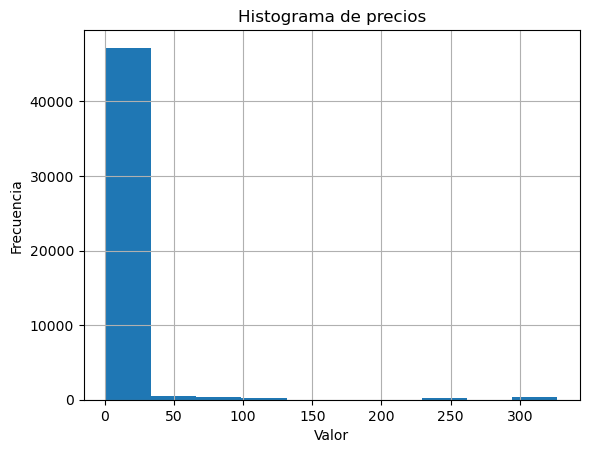

In [56]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['calculated_host_listings_count'].hist()

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [57]:
# hay datos que son outliers, pero no creo que sean absurdos. Lugares que cuenten con espacio para hospedar a 300 personas no nos parecen datos absurdos

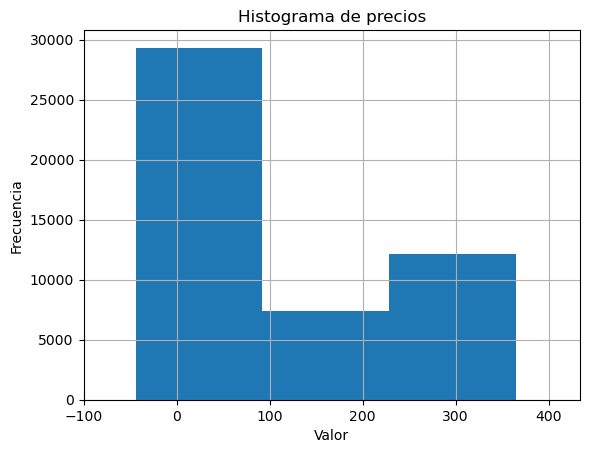

In [60]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['availability_365'].hist()

plt.xlim(left=-100)


# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [61]:
#eliminaremos los datos negativos por que son absurdos. es imposible tener  disponibilidad negativa, como mucho deberían de tomar valor 0, que sería no tener espacio
df_filtrado = df_sindl_sincol[df_sindl_sincol['availability_365'] >0]


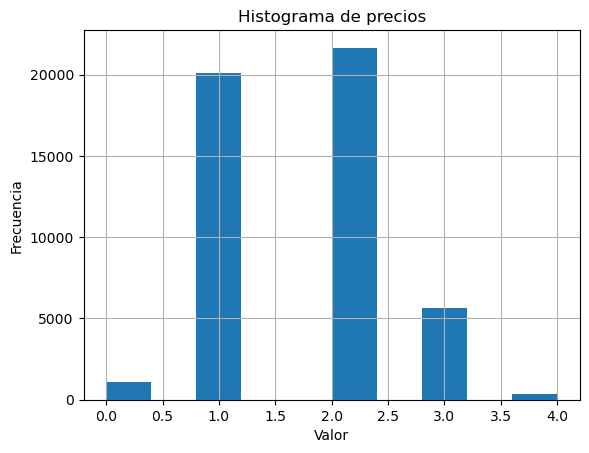

In [62]:
#volviendo al punto sobre los outliers, realizaremos un histograma para ver los datos:
import matplotlib.pyplot as plt
# Generar el histograma
df_sindl_sincol['neighbourhood_group'].hist()

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios')

# Mostrar el histograma
plt.show()

In [63]:
#no hay valores absurdos 

In [64]:
#opinion de los outliers: no creemos justo eliminar datos que sean extremandamente grandes ya que, mas en casos de precios, suelen haber unos pocos hospedajes que mse especializan en algo y destacan de forma extrema, por ende, no eliminaremos los outliers. 


In [65]:
#f):
group_counts = df_filtrado.groupby('neighbourhood_group')['calculated_host_listings_count'].nunique().reset_index()

group_counts.rename(columns={'calculated_host_listings_count': 'offer_group'}, inplace=True)

df_filtrados = df_filtrado.merge(group_counts, on='neighbourhood_group', how='left')